In [1]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import seaborn as sns

In [2]:
# Data collection & overview
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Datasets/car details v4.csv')
df.head()

,Make,Model,Price,Year,Kilometer,Fuel Type,Transmission,Location,Color,Owner,Seller Type,Engine,Max Power,Max Torque,Drivetrain,Length,Width,Height,Seating Capacity,Fuel Tank Capacity
0,Honda,Amaze 1.2 VX i-VTEC,505000,2017,87150,Petrol,Manual,Pune,Grey,First,Corporate,1198 cc,87 bhp @ 6000 rpm,109 Nm @ 4500 rpm,FWD,3990.0,1680.0,1505.0,5.0,35.0
1,Maruti Suzuki,Swift DZire VDI,450000,2014,75000,Diesel,Manual,Ludhiana,White,Second,Individual,1248 cc,74 bhp @ 4000 rpm,190 Nm @ 2000 rpm,FWD,3995.0,1695.0,1555.0,5.0,42.0
2,Hyundai,i10 Magna 1.2 Kappa2,220000,2011,67000,Petrol,Manual,Lucknow,Maroon,First,Individual,1197 cc,79 bhp @ 6000 rpm,112.7619 Nm @ 4000 rpm,FWD,3585.0,1595.0,1550.0,5.0,35.0
3,Toyota,Glanza G,799000,2019,37500,Petrol,Manual,Mangalore,Red,First,Individual,1197 cc,82 bhp @ 6000 rpm,113 Nm @ 4200 rpm,FWD,3995.0,1745.0,1510.0,5.0,37.0
4,Toyota,Innova 2.4 VX 7 STR [2016-2020],1950000,2018,69000,Diesel,Manual,Mumbai,Grey,First,Individual,2393 cc,148 bhp @ 3400 rpm,343 Nm @ 1400 rpm,RWD,4735.0,1830.0,1795.0,7.0,55.0


In [3]:
''' -Some features that I probably don't need and don't think will make as difference since I have the Model: Make, Max Power, Max Torque, Fuel Tank Capacity, Length, Width, Height, Seating Capacity, Engine
-A lot of featues that are not numbers that I have to sort out.
-I might have to do some kind scalling to make sure that there it won't affect the results, eg. Kilometer vs Seating Capacity
-I also have to make sure that there's no null value or NA in the dataset'''


# First let me understand how big the dataset is, including how many rows and columns there are
df.shape

(2059, 20)

In [4]:
# Data perperation

# Removing features that I don't need and will probably not effect the outcome
df = df.drop(columns=['Make', 'Max Power', 'Max Torque', 'Fuel Tank Capacity', 'Length', 'Width', 'Height', 'Seating Capacity', 'Engine'], axis=1)
df.head()

,Model,Price,Year,Kilometer,Fuel Type,Transmission,Location,Color,Owner,Seller Type,Drivetrain
0,Amaze 1.2 VX i-VTEC,505000,2017,87150,Petrol,Manual,Pune,Grey,First,Corporate,FWD
1,Swift DZire VDI,450000,2014,75000,Diesel,Manual,Ludhiana,White,Second,Individual,FWD
2,i10 Magna 1.2 Kappa2,220000,2011,67000,Petrol,Manual,Lucknow,Maroon,First,Individual,FWD
3,Glanza G,799000,2019,37500,Petrol,Manual,Mangalore,Red,First,Individual,FWD
4,Innova 2.4 VX 7 STR [2016-2020],1950000,2018,69000,Diesel,Manual,Mumbai,Grey,First,Individual,RWD


In [5]:
df.shape

(2059, 11)

In [6]:
df.dtypes

,0
Model,object
Price,int64
Year,int64
Kilometer,int64
Fuel Type,object
Transmission,object
Location,object
Color,object
Owner,object
Seller Type,object


In [7]:
# Checking if I'm missing any values anywhere
df.isna()

,Model,Price,Year,Kilometer,Fuel Type,Transmission,Location,Color,Owner,Seller Type,Drivetrain
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
2054,False,False,False,False,False,False,False,False,False,False,False
2055,False,False,False,False,False,False,False,False,False,False,False
2056,False,False,False,False,False,False,False,False,False,False,False
2057,False,False,False,False,False,False,False,False,False,False,False


In [8]:
df.isna().sum()

,0
Model,0
Price,0
Year,0
Kilometer,0
Fuel Type,0
Transmission,0
Location,0
Color,0
Owner,0
Seller Type,0


In [9]:
# Checking to see if any column are duplicated
df.duplicated()

,0
0,False
1,False
2,False
3,False
4,False
...,...
2054,False
2055,False
2056,False
2057,False


In [10]:
df.duplicated().sum()

0

In [11]:
df[df.duplicated(keep=False)]

,Model,Price,Year,Kilometer,Fuel Type,Transmission,Location,Color,Owner,Seller Type,Drivetrain


In [12]:
df = df.drop_duplicates()

In [13]:
df.duplicated().sum()

0

In [14]:
df.shape

(2059, 11)

In [15]:
df['Drivetrain'] = df['Drivetrain'].fillna('Unknown')

In [16]:
df['Drivetrain'].isnull().sum()

0

In [17]:
df.head()

,Model,Price,Year,Kilometer,Fuel Type,Transmission,Location,Color,Owner,Seller Type,Drivetrain
0,Amaze 1.2 VX i-VTEC,505000,2017,87150,Petrol,Manual,Pune,Grey,First,Corporate,FWD
1,Swift DZire VDI,450000,2014,75000,Diesel,Manual,Ludhiana,White,Second,Individual,FWD
2,i10 Magna 1.2 Kappa2,220000,2011,67000,Petrol,Manual,Lucknow,Maroon,First,Individual,FWD
3,Glanza G,799000,2019,37500,Petrol,Manual,Mangalore,Red,First,Individual,FWD
4,Innova 2.4 VX 7 STR [2016-2020],1950000,2018,69000,Diesel,Manual,Mumbai,Grey,First,Individual,RWD


In [18]:
# Moved the Label/Predictor Price, to the end
cols = list(df.columns)
cols.remove('Price')
cols.append('Price')
df = df[cols]
df.head()

,Model,Year,Kilometer,Fuel Type,Transmission,Location,Color,Owner,Seller Type,Drivetrain,Price
0,Amaze 1.2 VX i-VTEC,2017,87150,Petrol,Manual,Pune,Grey,First,Corporate,FWD,505000
1,Swift DZire VDI,2014,75000,Diesel,Manual,Ludhiana,White,Second,Individual,FWD,450000
2,i10 Magna 1.2 Kappa2,2011,67000,Petrol,Manual,Lucknow,Maroon,First,Individual,FWD,220000
3,Glanza G,2019,37500,Petrol,Manual,Mangalore,Red,First,Individual,FWD,799000
4,Innova 2.4 VX 7 STR [2016-2020],2018,69000,Diesel,Manual,Mumbai,Grey,First,Individual,RWD,1950000


In [19]:
# Removing space from column names
df = df.rename(columns={'Fuel Type': 'Fuel_Type', 'Seller Type': 'Seller_Type'})

In [20]:
df.head()

,Model,Year,Kilometer,Fuel_Type,Transmission,Location,Color,Owner,Seller_Type,Drivetrain,Price
0,Amaze 1.2 VX i-VTEC,2017,87150,Petrol,Manual,Pune,Grey,First,Corporate,FWD,505000
1,Swift DZire VDI,2014,75000,Diesel,Manual,Ludhiana,White,Second,Individual,FWD,450000
2,i10 Magna 1.2 Kappa2,2011,67000,Petrol,Manual,Lucknow,Maroon,First,Individual,FWD,220000
3,Glanza G,2019,37500,Petrol,Manual,Mangalore,Red,First,Individual,FWD,799000
4,Innova 2.4 VX 7 STR [2016-2020],2018,69000,Diesel,Manual,Mumbai,Grey,First,Individual,RWD,1950000


In [21]:
# Now going to one-hot encode all columns that don't have numbers
categorical_cols = ['Model', 'Fuel_Type', 'Transmission', 'Location', 'Color', 'Owner', 'Seller_Type', 'Drivetrain']
encoded_df = pd.get_dummies(df, columns=categorical_cols, drop_first=True, dtype=int)

In [22]:
encoded_df.head()

,Year,Kilometer,Price,Model_3-Series 320d,Model_3-Series 320d Highline Sedan,Model_3-Series 320d Luxury Edition,Model_3-Series 320d Luxury Line,Model_3-Series 320d Luxury Line [2014-2016],Model_3-Series 320d Prestige,Model_3-Series 320d Sport Line,...,Owner_First,Owner_Fourth,Owner_Second,Owner_Third,Owner_UnRegistered Car,Seller_Type_Corporate,Seller_Type_Individual,Drivetrain_FWD,Drivetrain_RWD,Drivetrain_Unknown
0,2017,87150,505000,0,0,0,0,0,0,0,...,1,0,0,0,0,1,0,1,0,0
1,2014,75000,450000,0,0,0,0,0,0,0,...,0,0,1,0,0,0,1,1,0,0
2,2011,67000,220000,0,0,0,0,0,0,0,...,1,0,0,0,0,0,1,1,0,0
3,2019,37500,799000,0,0,0,0,0,0,0,...,1,0,0,0,0,0,1,1,0,0
4,2018,69000,1950000,0,0,0,0,0,0,0,...,1,0,0,0,0,0,1,0,1,0


In [23]:
# Now going to apply a correlation matrix to see relationships between features and labels
correlation_matrix = encoded_df.corr()
correlation_matrix

,Year,Kilometer,Price,Model_3-Series 320d,Model_3-Series 320d Highline Sedan,Model_3-Series 320d Luxury Edition,Model_3-Series 320d Luxury Line,Model_3-Series 320d Luxury Line [2014-2016],Model_3-Series 320d Prestige,Model_3-Series 320d Sport Line,...,Owner_First,Owner_Fourth,Owner_Second,Owner_Third,Owner_UnRegistered Car,Seller_Type_Corporate,Seller_Type_Individual,Drivetrain_FWD,Drivetrain_RWD,Drivetrain_Unknown
Year,1.000000,-0.296547,0.311400,-0.029010,-0.029010,0.029987,-0.005580,0.000691,0.009964,-0.027552,...,0.315762,-0.076776,-0.274004,-0.220556,0.112216,0.031471,-0.036021,0.075548,0.034013,-0.317998
Kilometer,-0.296547,1.000000,-0.150825,0.008207,0.027205,-0.011618,0.015608,0.010073,-0.012764,0.004593,...,-0.109016,0.013505,0.109357,0.057724,-0.062945,-0.028835,0.028340,-0.036722,0.007502,0.059091
Price,0.311400,-0.150825,1.000000,-0.008228,-0.004583,0.025940,0.021462,0.015750,0.006206,0.000084,...,0.008855,-0.024310,-0.051509,0.016638,0.150309,0.096228,-0.085427,-0.447695,0.257612,-0.083635
Model_3-Series 320d,-0.029010,0.008207,-0.008228,1.000000,-0.000486,-0.000486,-0.001377,-0.000687,-0.000687,-0.000842,...,-0.042284,-0.000842,0.046865,-0.003181,-0.002238,-0.003719,0.003884,-0.029774,-0.009473,0.082889
Model_3-Series 320d Highline Sedan,-0.029010,0.027205,-0.004583,-0.000486,1.000000,-0.000486,-0.001377,-0.000687,-0.000687,-0.000842,...,0.011492,-0.000842,-0.010368,-0.003181,-0.002238,-0.003719,0.003884,-0.029774,-0.009473,0.082889
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Seller_Type_Corporate,0.031471,-0.028835,0.096228,-0.003719,-0.003719,-0.003719,0.037046,-0.005261,-0.005261,-0.006445,...,0.051856,-0.006445,-0.040935,-0.024349,-0.017128,1.000000,-0.957632,-0.023639,0.000927,-0.009117
Seller_Type_Individual,-0.036021,0.028340,-0.085427,0.003884,0.003884,0.003884,-0.034677,0.005494,0.005494,0.006731,...,-0.057191,0.006731,0.045982,0.025426,0.017886,-0.957632,1.000000,0.018117,-0.002618,0.012531
Drivetrain_FWD,0.075548,-0.036722,-0.447695,-0.029774,-0.029774,-0.029774,-0.084358,-0.042117,-0.042117,-0.051595,...,0.169006,-0.051595,-0.134314,-0.079960,-0.036033,-0.023639,0.018117,1.000000,-0.580483,-0.359205
Drivetrain_RWD,0.034013,0.007502,0.257612,-0.009473,-0.009473,0.051292,0.145323,0.072555,0.072555,0.088884,...,-0.073172,-0.016416,0.072474,0.023225,-0.003650,0.000927,-0.002618,-0.580483,1.000000,-0.114290


<Axes: >

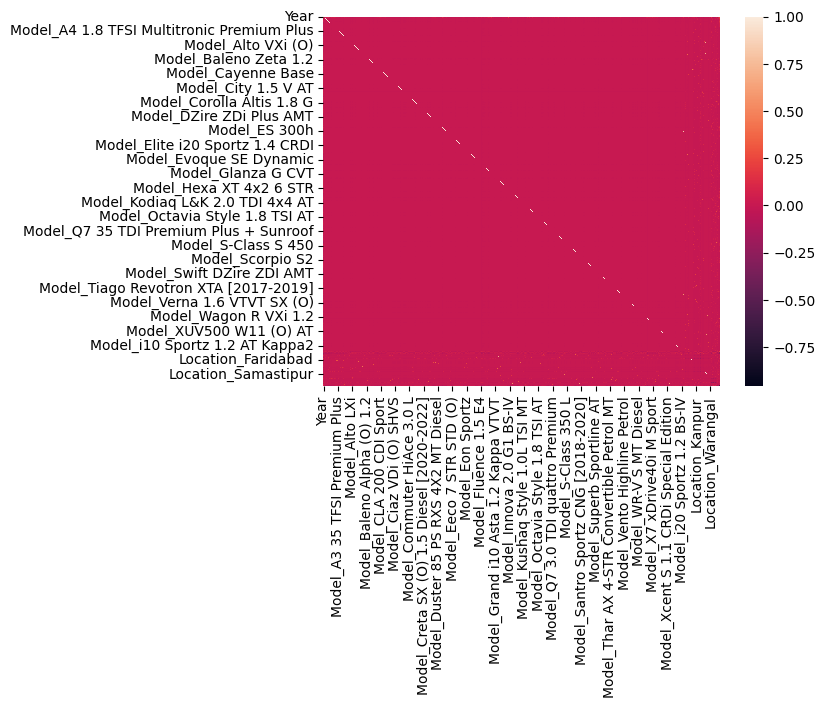

In [24]:
# Adding a heatmap to the matrix
sns.heatmap(correlation_matrix)

<ipython-input-25-a54d68ab6cbe>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=corr_with_price.values, y=corr_with_price.index, palette="coolwarm")


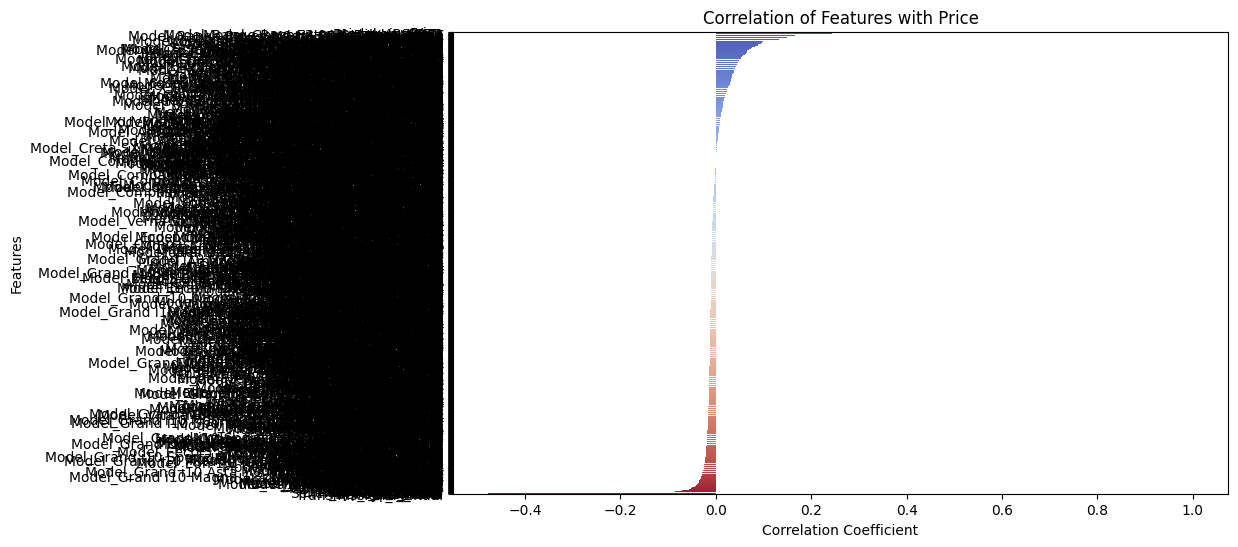

In [25]:
# Compute correlation only with 'Price'
corr_with_price = encoded_df.corr()['Price'].sort_values(ascending=False)

# Plot a bar chart of correlations
plt.figure(figsize=(10, 6))
sns.barplot(x=corr_with_price.values, y=corr_with_price.index, palette="coolwarm")
plt.title("Correlation of Features with Price")
plt.xlabel("Correlation Coefficient")
plt.ylabel("Features")
plt.show()

In [26]:
# Creating a second correlation matrix without location

# List of columns to exclude
columns_to_exclude = ['Location', 'Color']

# Compute correlation matrix without those columns
df_without_columns = df.drop(columns=columns_to_exclude)

In [27]:
df_without_columns.head()


,Model,Year,Kilometer,Fuel_Type,Transmission,Owner,Seller_Type,Drivetrain,Price
0,Amaze 1.2 VX i-VTEC,2017,87150,Petrol,Manual,First,Corporate,FWD,505000
1,Swift DZire VDI,2014,75000,Diesel,Manual,Second,Individual,FWD,450000
2,i10 Magna 1.2 Kappa2,2011,67000,Petrol,Manual,First,Individual,FWD,220000
3,Glanza G,2019,37500,Petrol,Manual,First,Individual,FWD,799000
4,Innova 2.4 VX 7 STR [2016-2020],2018,69000,Diesel,Manual,First,Individual,RWD,1950000


In [28]:
# Now going to one-hot encode all columns that don't have numbers
takeout = ['Model']
df2 = df_without_columns.drop(columns=takeout, axis=1)

In [29]:
df2.head()

,Year,Kilometer,Fuel_Type,Transmission,Owner,Seller_Type,Drivetrain,Price
0,2017,87150,Petrol,Manual,First,Corporate,FWD,505000
1,2014,75000,Diesel,Manual,Second,Individual,FWD,450000
2,2011,67000,Petrol,Manual,First,Individual,FWD,220000
3,2019,37500,Petrol,Manual,First,Individual,FWD,799000
4,2018,69000,Diesel,Manual,First,Individual,RWD,1950000


In [30]:
# Now going to one-hot encode all columns that don't have numbers
categorical_cols = ['Fuel_Type', 'Transmission', 'Owner', 'Seller_Type', 'Drivetrain']
encoded2_df = pd.get_dummies(df2, columns=categorical_cols, drop_first=True, dtype=int)

In [31]:
encoded2_df.shape

(2059, 22)

In [32]:
# Now going to apply a correlation matrix to see relationships between features and labels on encoded2
correlation_matrix2 = encoded2_df.corr()
correlation_matrix2

,Year,Kilometer,Price,Fuel_Type_CNG + CNG,Fuel_Type_Diesel,Fuel_Type_Electric,Fuel_Type_Hybrid,Fuel_Type_LPG,Fuel_Type_Petrol,Fuel_Type_Petrol + CNG,...,Owner_First,Owner_Fourth,Owner_Second,Owner_Third,Owner_UnRegistered Car,Seller_Type_Corporate,Seller_Type_Individual,Drivetrain_FWD,Drivetrain_RWD,Drivetrain_Unknown
Year,1.000000,-0.296547,0.311400,-0.015899,0.003381,0.074491,0.048178,-0.079602,-0.002833,0.010321,...,0.315762,-0.076776,-0.274004,-0.220556,0.112216,0.031471,-0.036021,0.075548,0.034013,-0.317998
Kilometer,-0.296547,1.000000,-0.150825,0.001006,0.193159,-0.035017,-0.026127,0.000705,-0.186560,0.001451,...,-0.109016,0.013505,0.109357,0.057724,-0.062945,-0.028835,0.028340,-0.036722,0.007502,0.059091
Price,0.311400,-0.150825,1.000000,-0.013248,0.168018,-0.004952,0.086267,-0.030448,-0.144603,-0.010278,...,0.008855,-0.024310,-0.051509,0.016638,0.150309,0.096228,-0.085427,-0.447695,0.257612,-0.083635
Fuel_Type_CNG + CNG,-0.015899,0.001006,-0.013248,1.000000,-0.022465,-0.001287,-0.000842,-0.001088,-0.020243,-0.000486,...,-0.042284,-0.000842,0.046865,-0.003181,-0.002238,-0.003719,0.003884,0.016320,-0.009473,-0.005862
Fuel_Type_Diesel,0.003381,0.193159,0.168018,-0.022465,1.000000,-0.059523,-0.038929,-0.050282,-0.935892,-0.022465,...,-0.087296,0.012012,0.103339,-0.016479,-0.026096,-0.012079,0.009023,-0.356724,0.255653,-0.048065
Fuel_Type_Electric,0.074491,-0.035017,-0.004952,-0.001287,-0.059523,1.000000,-0.002231,-0.002882,-0.053636,-0.001287,...,0.030448,-0.002231,-0.027472,-0.008428,-0.005929,-0.009855,0.010291,0.043241,-0.025101,-0.015532
Fuel_Type_Hybrid,0.048178,-0.026127,0.086267,-0.000842,-0.038929,-0.002231,1.000000,-0.001885,-0.035079,-0.000842,...,0.019914,-0.001459,-0.017967,-0.005512,-0.003878,-0.006445,0.006731,0.001655,-0.016416,-0.010158
Fuel_Type_LPG,-0.079602,0.000705,-0.030448,-0.001088,-0.050282,-0.002882,-0.001885,1.000000,-0.045309,-0.001088,...,-0.046497,0.256817,0.028034,-0.007120,-0.005008,-0.008325,0.008693,0.015894,-0.021204,0.026608
Fuel_Type_Petrol,-0.002833,-0.186560,-0.144603,-0.020243,-0.935892,-0.053636,-0.035079,-0.045309,1.000000,-0.020243,...,0.086334,-0.035079,-0.105420,0.026102,0.032916,0.023306,-0.020735,0.329262,-0.233421,0.038385
Fuel_Type_Petrol + CNG,0.010321,0.001451,-0.010278,-0.000486,-0.022465,-0.001287,-0.000842,-0.001088,-0.020243,1.000000,...,0.011492,-0.000842,-0.010368,-0.003181,-0.002238,-0.003719,0.003884,0.016320,-0.009473,-0.005862


<Axes: >

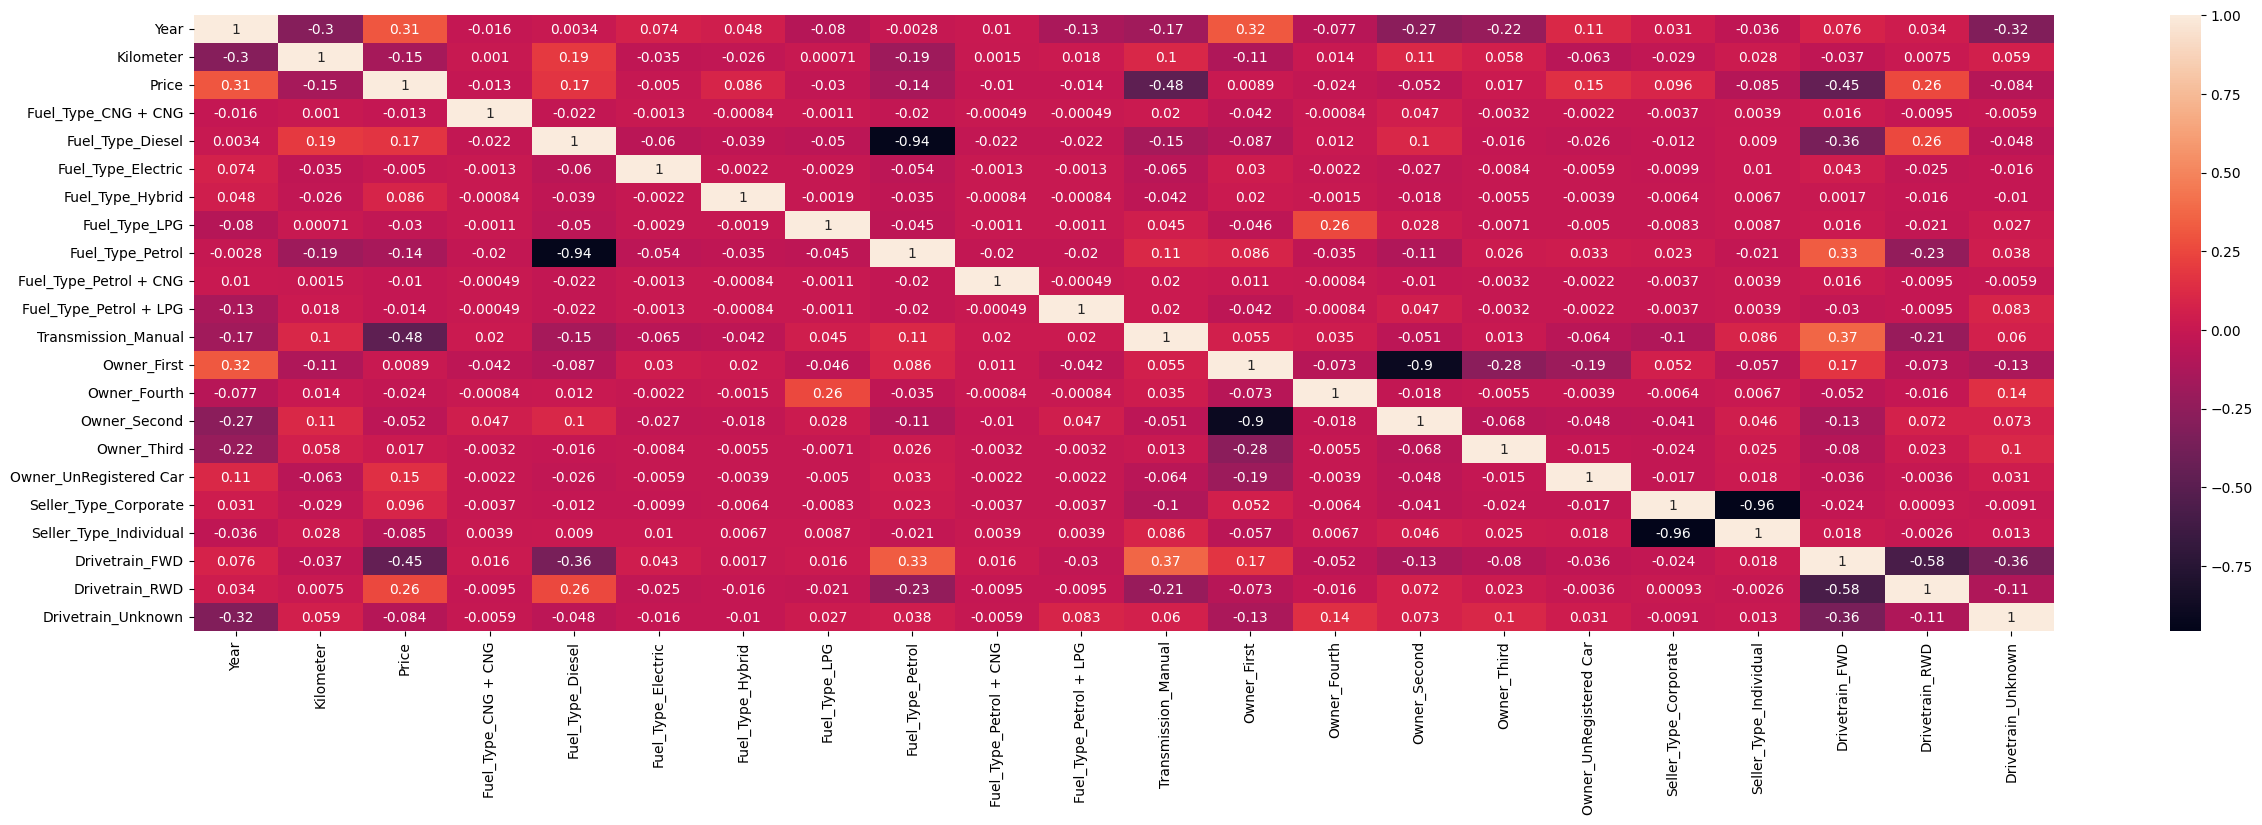

In [33]:
# Adding a heatmap to the matrix
plt.figure(figsize=(30, 8))
sns.heatmap(correlation_matrix2, annot=True)

In [34]:
# Partitioning data for training
Predictors = encoded_df.drop(columns=['Price']).columns.tolist()
x = encoded_df[Predictors]
y = encoded_df['Price']

# Training
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=0.2, random_state=1)

In [35]:
x_train.shape

(1647, 1162)

In [36]:
encoded_df.shape

(2059, 1163)

In [37]:
x_val.shape

(412, 1162)

In [38]:
# Fitting model
lr = LinearRegression()
lr.fit(x_train, y_train)

LinearRegression()

In [39]:
# Evaluating the model
y_estimates = lr.predict(x_val)
y_estimates

array([ 4.18329980e+06, -2.57559864e+05,  5.14301315e+05,  2.66912190e+06,
        6.87340604e+05,  6.77717849e+05,  2.85452861e+06,  2.97545401e+06,
        1.47767680e+06,  1.08065703e+06,  2.30694044e+06,  3.35216282e+06,
        2.90949486e+06,  1.17852623e+06,  5.30778067e+05,  8.13871023e+05,
        8.08053687e+05,  1.27086405e+06,  3.39601704e+06,  1.92958186e+06,
        1.19736331e+06,  1.71921821e+06,  2.80887131e+06,  5.27372852e+06,
        1.94672027e+06,  5.63762180e+06,  7.85323047e+05,  8.11988948e+05,
        1.38039019e+06,  3.26964822e+06,  3.36070720e+05,  1.07464604e+06,
        1.45232581e+06,  1.18943151e+06,  4.96219910e+05,  1.82077774e+05,
        2.88899797e+06,  9.00425096e+05, -2.69829930e+05,  3.65626930e+06,
        5.25374271e+05,  2.16169899e+05,  2.62414030e+06,  7.98492685e+05,
        6.95607102e+05,  4.30410504e+05,  2.31646534e+05,  2.75115349e+06,
        5.26079018e+05,  7.25188063e+05,  5.77369559e+05,  1.77623899e+06,
       -1.85521409e+06,  

In [40]:
y_val

,Price
1178,10800000
1707,595000
920,198000
111,2250000
1011,695000
...,...
306,430000
1886,800000
1873,899000
1331,445000


In [41]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df_scaled = scaler.fit_transform(encoded_df)

In [42]:
df_scaled = pd.DataFrame(df_scaled, columns=encoded_df.columns)

In [43]:
# Partitioning data for training
Predictors = df_scaled.drop(columns=['Price']).columns.tolist()
x = df_scaled[Predictors]
y = df_scaled['Price']

# Training
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=0.2, random_state=1)

In [44]:
# Fitting model
lr = LinearRegression()
lr.fit(x_train, y_train)

LinearRegression()

In [45]:
# Evaluating the model
y_estimates = lr.predict(x_val)
y_estimates

array([ 0.11828846, -0.00877113,  0.01331296,  0.07496558,  0.01826387,
        0.01798855,  0.08027034,  0.08373019,  0.04087656,  0.02951724,
        0.06460303,  0.09450839,  0.081843  ,  0.03231742,  0.01378439,
        0.0218841 ,  0.02171765,  0.03495934,  0.09576313,  0.05380624,
        0.03285638,  0.04778742,  0.07896402,  0.14948724,  0.05429659,
        0.15989877,  0.0210673 ,  0.02183025,  0.03809305,  0.09214753,
        0.00821352,  0.02934526,  0.04015123,  0.03262944,  0.01279563,
        0.00380755,  0.08125656,  0.02436054, -0.0091222 ,  0.10320933,
        0.01362978,  0.00478298,  0.07367859,  0.0214441 ,  0.01850039,
        0.01091272,  0.00522579,  0.07731262,  0.01364994,  0.01934674,
        0.01511744,  0.04941887, -0.05448239,  0.01406403,  0.11436521,
        0.08739152,  0.045774  ,  0.09449669,  0.13563534,  0.16302709,
        0.09901223,  0.02796243,  0.03785086,  0.03113717,  0.08934272,
        0.0373351 ,  0.0282678 ,  0.02991808,  0.09010789,  0.07

In [46]:
y_val

,Price
1178,0.307602
1707,0.015622
920,0.004263
111,0.062974
1011,0.018483
...,...
306,0.010901
1886,0.021487
1873,0.024320
1331,0.011330


In [47]:
mean = mean_absolute_error(y_val, y_estimates)
mean

0.022711233004504165

In [48]:
mean_square = mean_squared_error(y_val, y_estimates)
mean_square

0.0045174128272245945

In [49]:
RSQ = lr.score(x_val, y_val)
RSQ

0.33744226297450153